In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
from cleanlab.classification import CleanLearning
from cleanlab.filter import find_label_issues

c:\Users\amazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_file = pd.read_csv('train_dataset.csv')
test_file = pd.read_csv('test_dataset.csv')

In [3]:
train_file.head()

,id,pixels,emotion
0,1,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,0
1,2,151 150 147 155 148 133 111 140 170 174 182 15...,0
2,3,231 212 156 164 174 138 161 173 182 200 106 38...,2
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,4
4,5,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,6


In [ ]:
len(train_file.loc[train_file.duplicated(subset=['pixels']) == True])

In [4]:
train_file[train_file.duplicated(subset=['pixels'], keep=False)].groupby(['pixels']).filter(lambda x: x['emotion'].nunique() > 1)

,id,pixels,emotion
1216,1217,101 117 88 114 123 101 76 72 64 40 40 49 50 49...,0
3360,3361,101 117 88 114 123 101 76 72 64 40 40 49 50 49...,4
3783,3784,24 21 32 68 62 40 32 32 31 36 56 84 106 118 12...,2
4178,4179,24 21 32 68 62 40 32 32 31 36 56 84 106 118 12...,6


In [3]:
train_file.drop(3360, inplace=True)
train_file.drop(3783, inplace=True)

In [6]:
train_file[train_file.duplicated(subset=['pixels'], keep=False)].groupby(['pixels']).filter(lambda x: x['emotion'].nunique() > 1)

,id,pixels,emotion


In [ ]:
train_file.loc[train_file.duplicated(subset=['pixels']) == True]

In [4]:
train_file = train_file.drop_duplicates(subset=['pixels'])

In [5]:
train_file.reset_index()

,index,id,pixels,emotion
0,0,1,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,0
1,1,2,151 150 147 155 148 133 111 140 170 174 182 15...,0
2,2,3,231 212 156 164 174 138 161 173 182 200 106 38...,2
3,3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,4
4,4,5,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,6
...,...,...,...,...
4953,4995,4996,22 24 23 23 25 24 23 20 18 13 6 2 0 1 7 22 32 ...,3
4954,4996,4997,73 85 87 87 74 118 120 132 134 127 133 118 105...,3
4955,4997,4998,253 253 254 254 254 254 250 219 166 141 109 70...,6
4956,4998,4999,78 84 77 95 90 85 72 75 79 84 86 82 88 102 110...,6


In [ ]:
train_file['emotion'].isna().sum()

In [ ]:
train_file['pixels'].isna().sum()

In [6]:
pixels = [np.array(i.split()) for i in train_file['pixels']]
print(pixels[0])

['70' '80' '82' ... '106' '109' '82']


In [7]:
pixels = np.float64(pixels)/255.
print(pixels[0])

[0.2745098  0.31372549 0.32156863 ... 0.41568627 0.42745098 0.32156863]


In [ ]:
len(train_file), len(test_file)

In [ ]:
pixels[0], len(pixels[0])

In [8]:
pixels = [i.reshape(48, 48) for i in pixels]

In [ ]:
pixels[0]

In [9]:
train_file['pixels'] = pixels

In [ ]:
train_file.head(3)

In [16]:
t1 = train_file.loc[train_file['emotion'] == 3]

In [10]:
import matplotlib.pyplot as plt

In [13]:
set(train_file.duplicated(subset=['pixels']))

{False}

index 4900 emotion 3


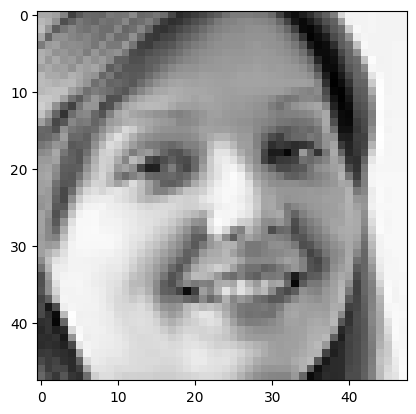

index 4901 emotion 2


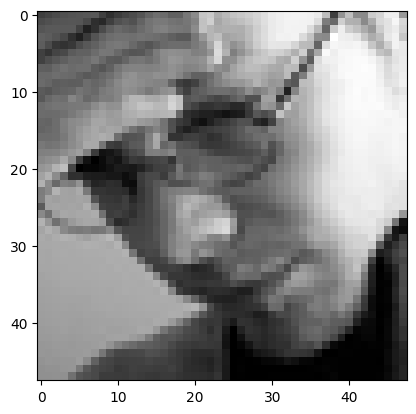

index 4902 emotion 4


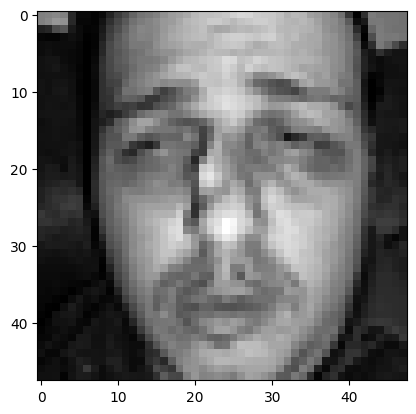

index 4903 emotion 2


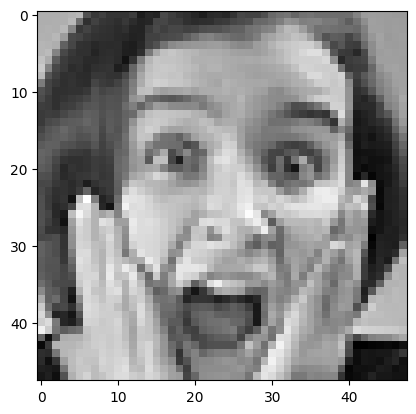

index 4904 emotion 5


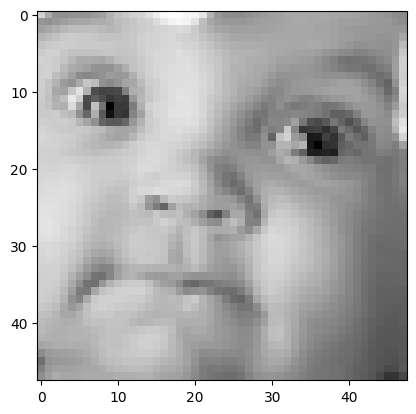

index 4905 emotion 5


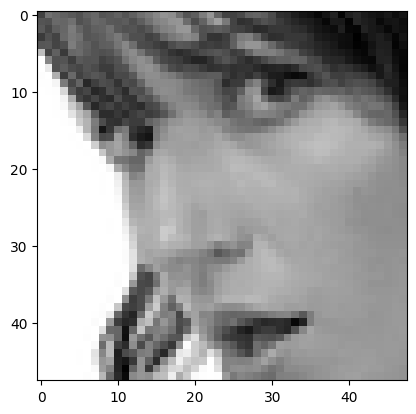

index 4906 emotion 3


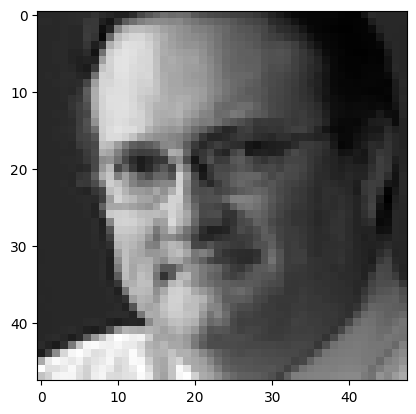

index 4907 emotion 4


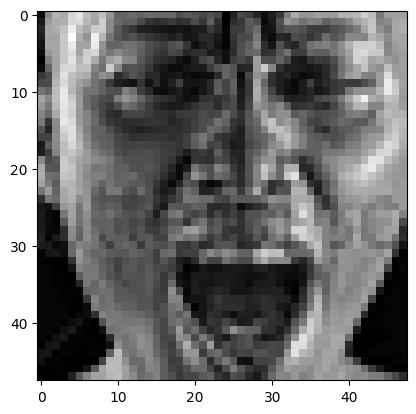

index 4908 emotion 3


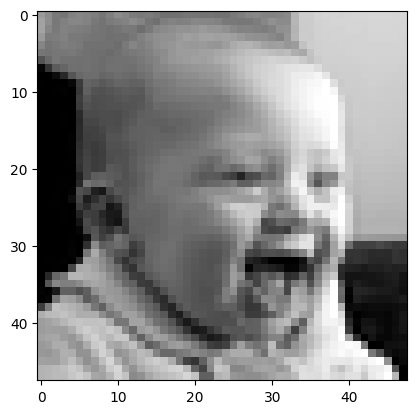

index 4909 emotion 4


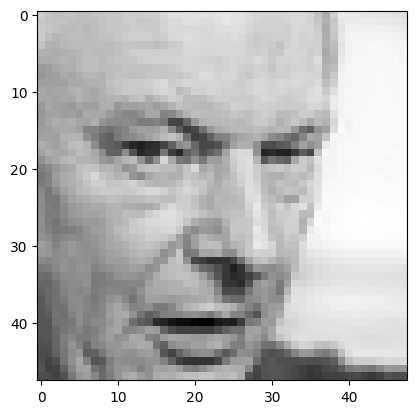

index 4910 emotion 3


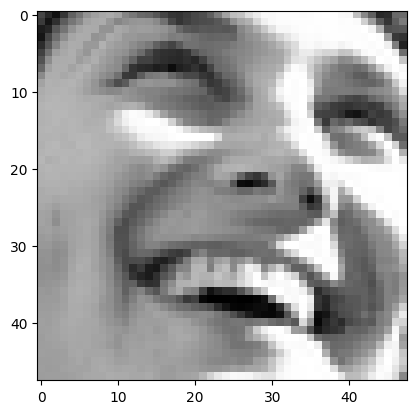

index 4911 emotion 6


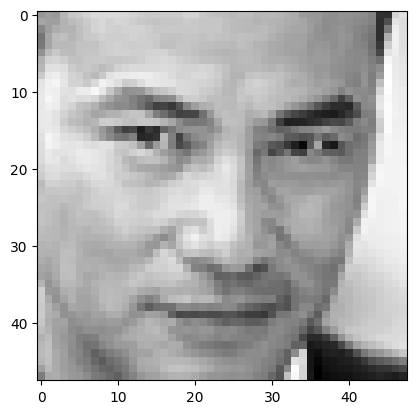

index 4912 emotion 3


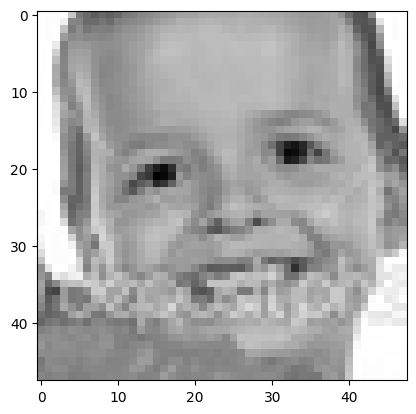

index 4913 emotion 0


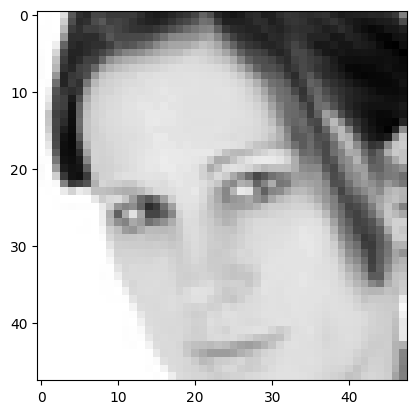

index 4914 emotion 3


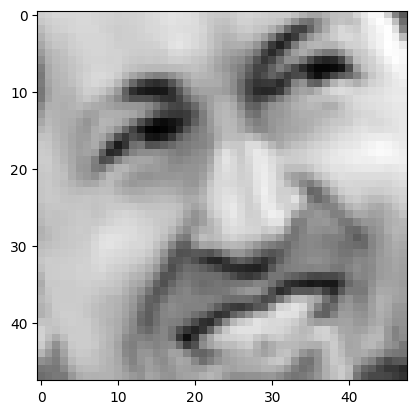

index 4915 emotion 3


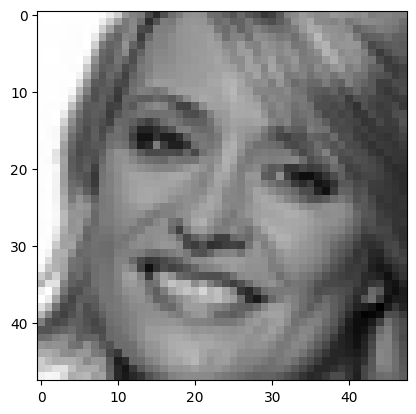

index 4916 emotion 4


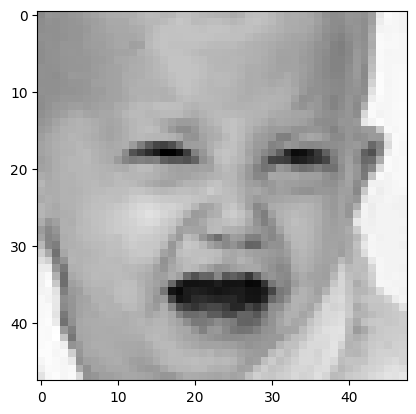

index 4917 emotion 3


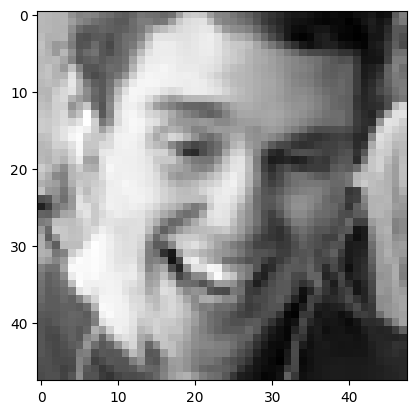

index 4918 emotion 6


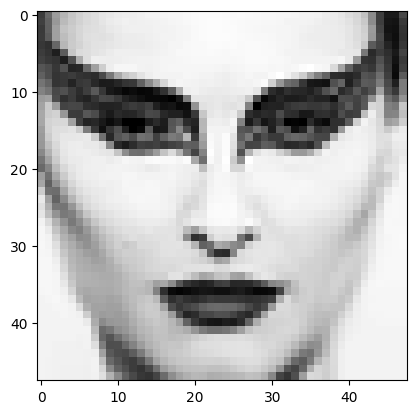

index 4919 emotion 2


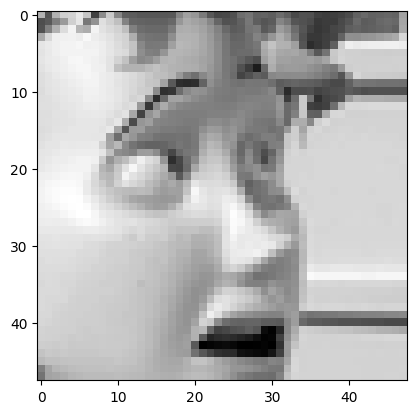

index 4920 emotion 3


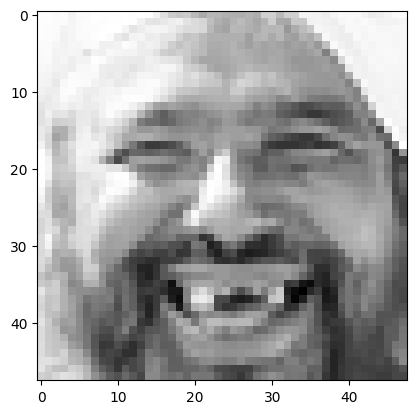

index 4921 emotion 0


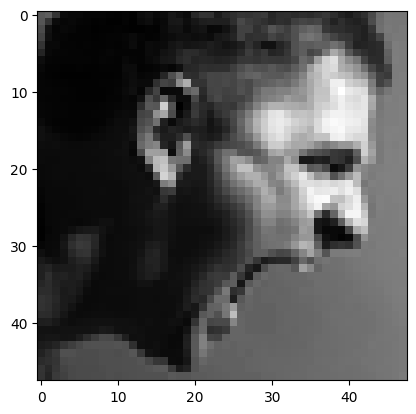

index 4922 emotion 3


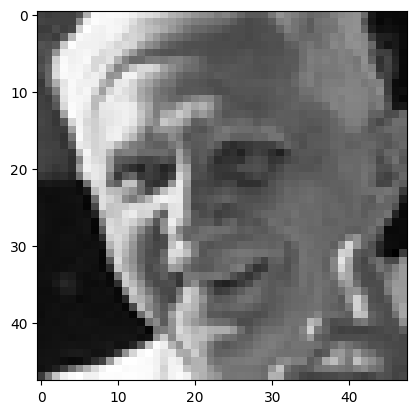

index 4923 emotion 3


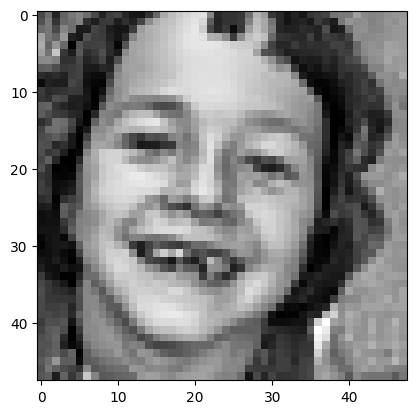

index 4924 emotion 2


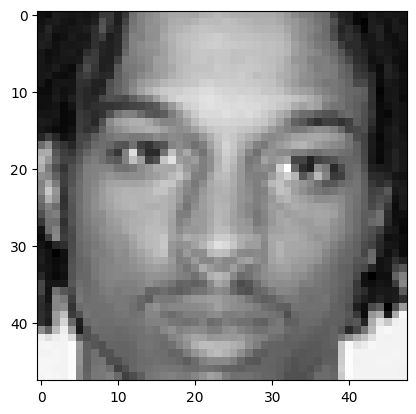

index 4925 emotion 3


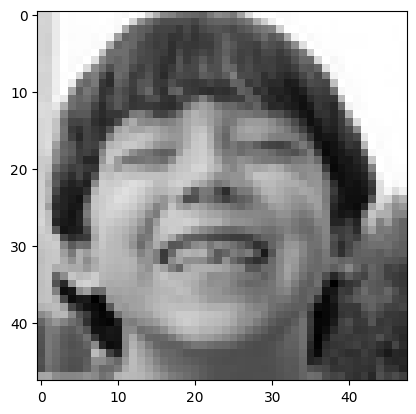

index 4926 emotion 6


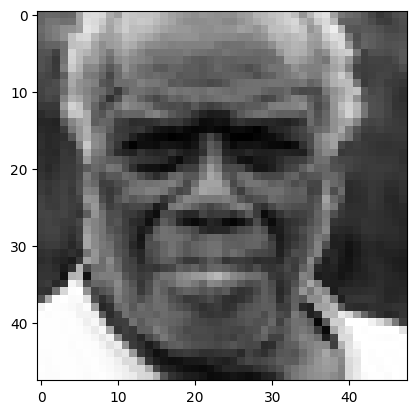

index 4927 emotion 1


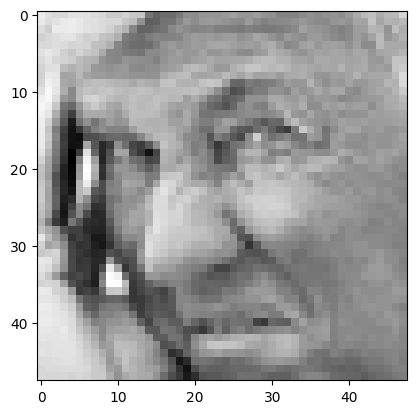

index 4928 emotion 0


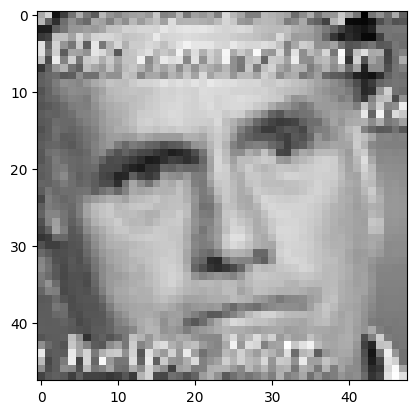

index 4929 emotion 2


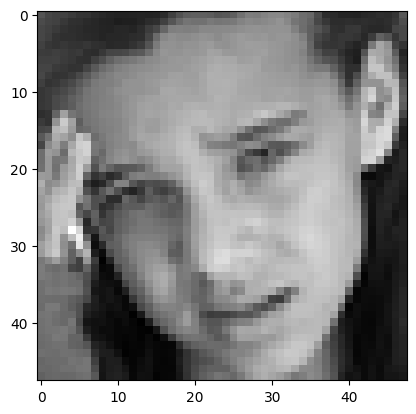

index 4930 emotion 3


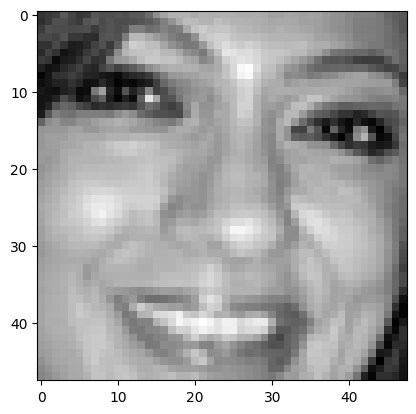

index 4931 emotion 5


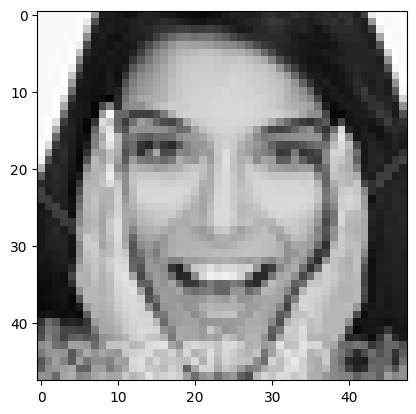

index 4932 emotion 6


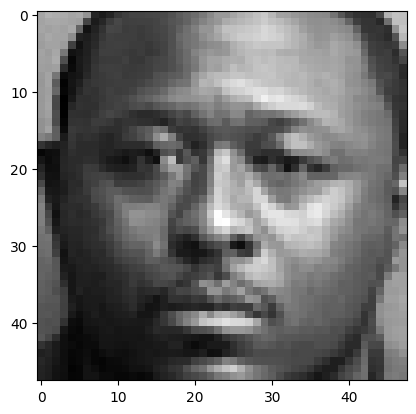

index 4933 emotion 2


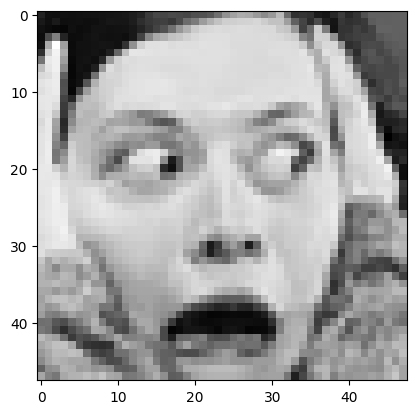

index 4934 emotion 2


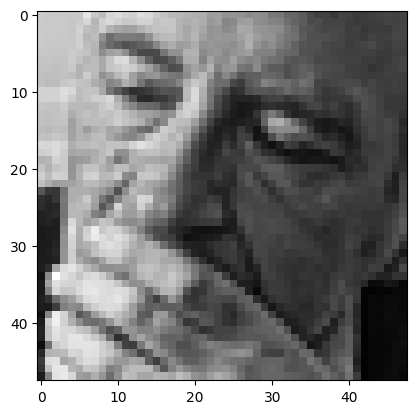

index 4935 emotion 2


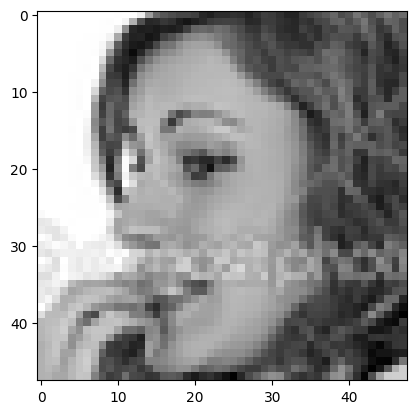

index 4936 emotion 2


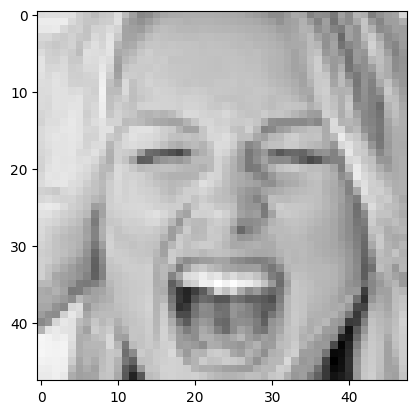

index 4937 emotion 2


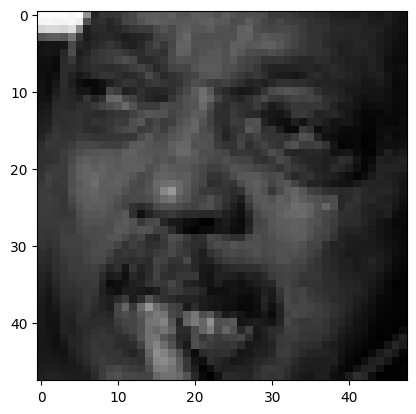

index 4938 emotion 3


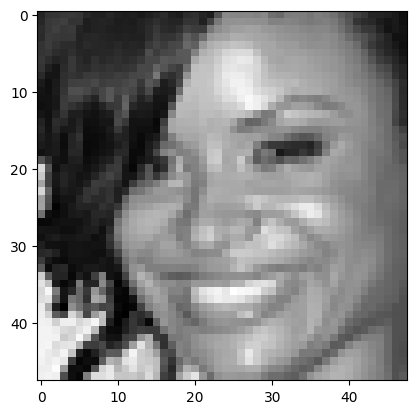

index 4939 emotion 2


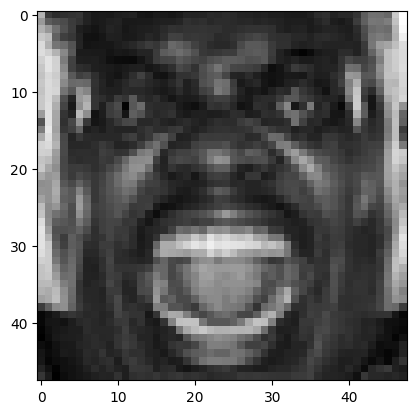

index 4940 emotion 6


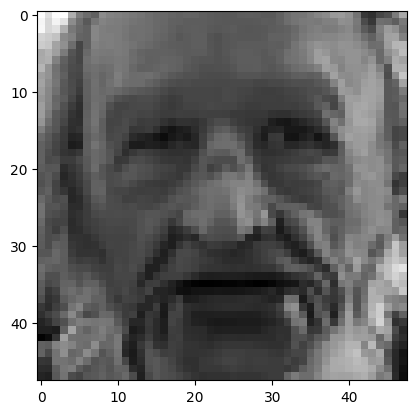

index 4941 emotion 3


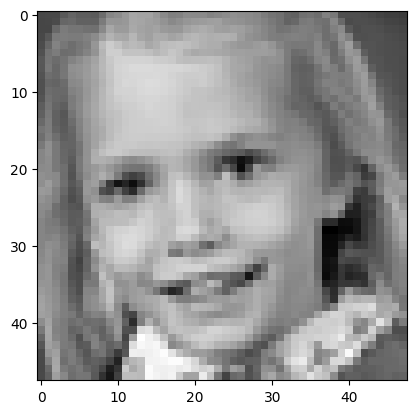

index 4942 emotion 3


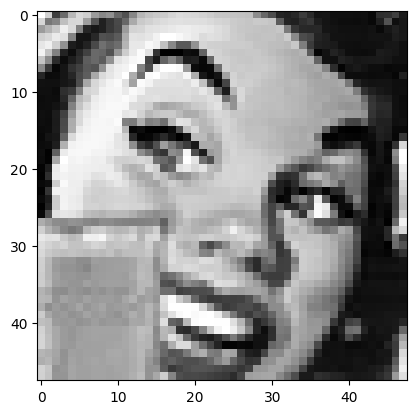

index 4943 emotion 5


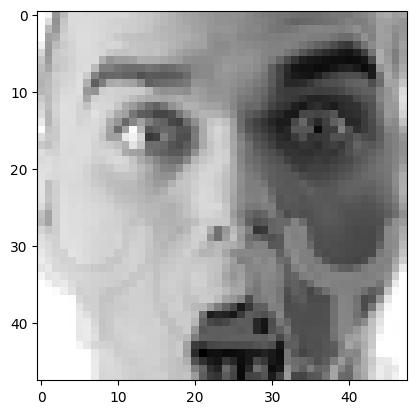

index 4944 emotion 2


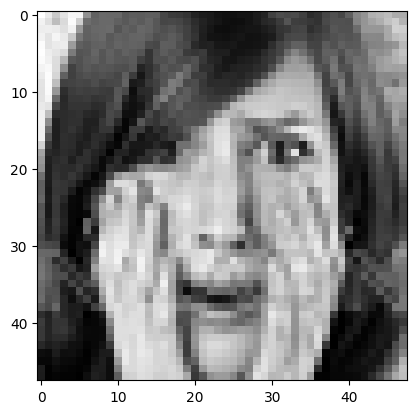

index 4945 emotion 4


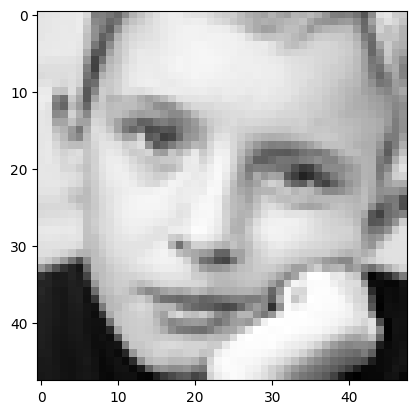

index 4946 emotion 3


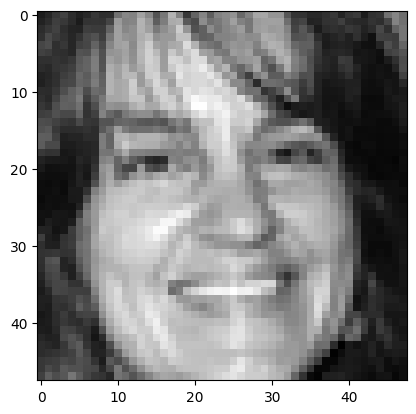

index 4947 emotion 6


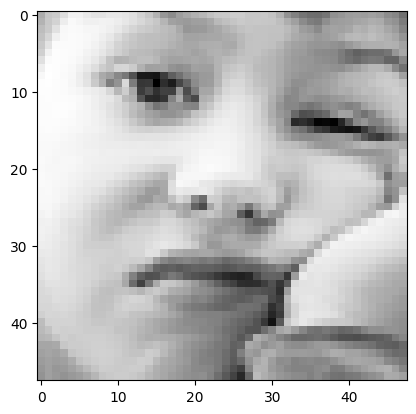

index 4948 emotion 2


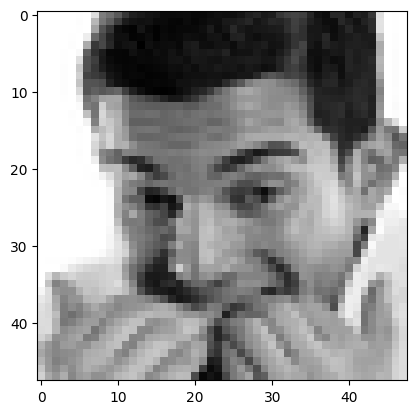

index 4949 emotion 5


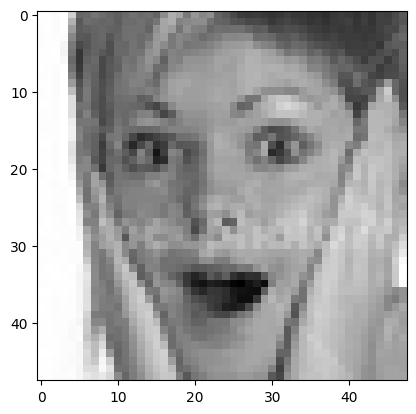

index 4950 emotion 0


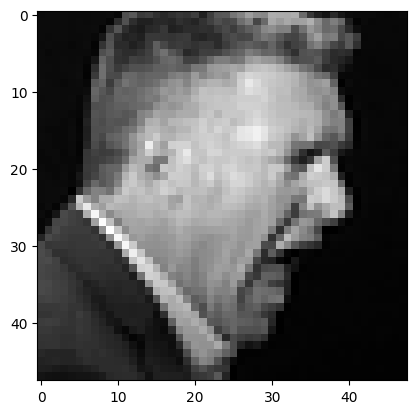

index 4951 emotion 3


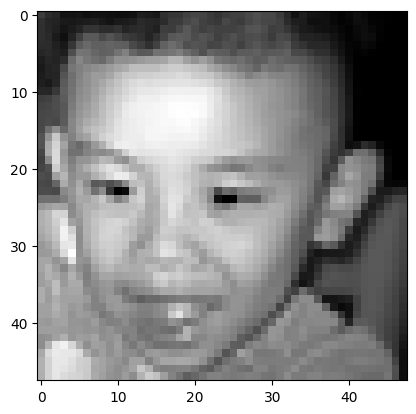

index 4952 emotion 2


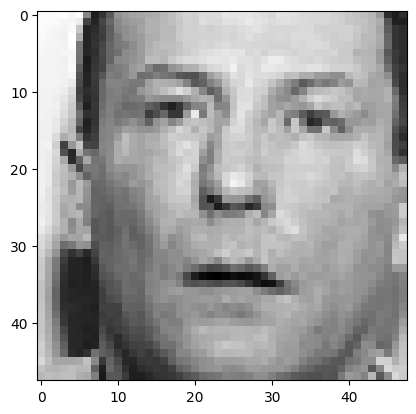

index 4953 emotion 3


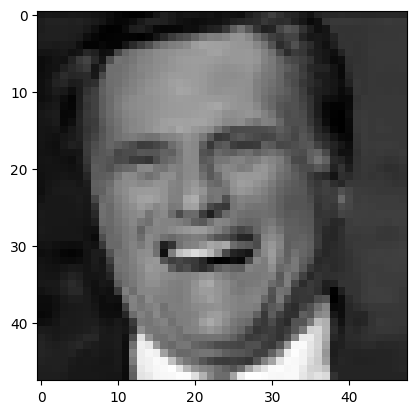

index 4954 emotion 3


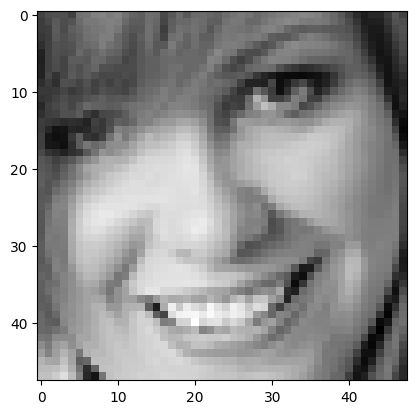

index 4955 emotion 6


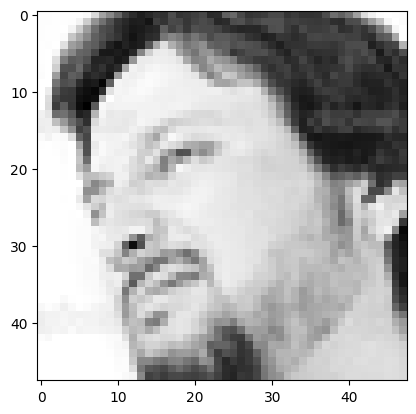

index 4956 emotion 6


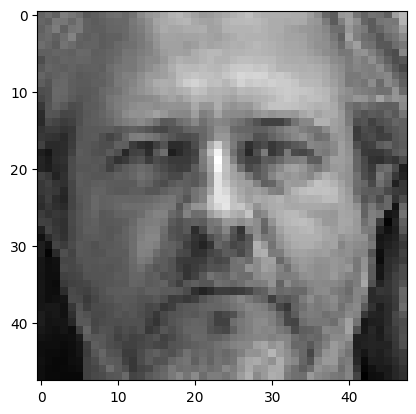

index 4957 emotion 3


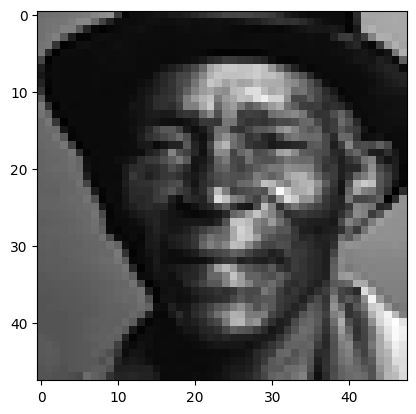

In [38]:
for i, j, k in zip(train_file['pixels'][4900:4959], train_file['emotion'][4900:4959], range(4900, 4959)):
    print("index", k, "emotion", j)
    plt.imshow(i, cmap='grey')
    plt.show()

In [21]:
def f1():
    train_file['emotion'][12] = 0
    train_file['emotion'][18] = 5
    train_file['emotion'][19] = 0
    train_file['emotion'][20] = 6
    train_file['emotion'][33] = 6
    train_file['emotion'][45] = 5
    train_file['emotion'][48] = 6
    train_file['emotion'][50] = 4
    train_file['emotion'][58] = 0
    #remove train_file[59]
    train_file['emotion'][60] = 5
    train_file['emotion'][66] = 3
    train_file['emotion'][69] = 2
    train_file['emotion'][72] = 2
    train_file['emotion'][79] = 0
    train_file['emotion'][85] = 6
    train_file['emotion'][87] = 3
    train_file['emotion'][91] = 6
    train_file['emotion'][92] = 2
    train_file['emotion'][98] = 6
    train_file['emotion'][101] = 5
    train_file['emotion'][104] = 2
    #drop train_file[106]
    train_file['emotion'][110] = 4
    train_file['emotion'][114] = 6
    #drop train_file[115]
    train_file['emotion'][121] = 1
    train_file['emotion'][126] = 1
    train_file['emotion'][127] = 1
    train_file['emotion'][129] = 6
    train_file['emotion'][138] = 4
    train_file['emotion'][146] = 3
    train_file['emotion'][147] = 0
    train_file['emotion'][149] = 5
    train_file['emotion'][150] = 2
    train_file['emotion'][151] = 0
    train_file['emotion'][154] = 1
    train_file['emotion'][158] = 0
    train_file['emotion'][161] = 1
    train_file['emotion'][163] = 3
    train_file['emotion'][168] = 3
    train_file['emotion'][172] = 6
    train_file['emotion'][179] = 0
    train_file['emotion'][181] = 5
    train_file['emotion'][184] = 2
    train_file['emotion'][185] = 0
    train_file['emotion'][200] = 4
    train_file['emotion'][201] = 4
    train_file['emotion'][202] = 4
    train_file['emotion'][203] = 6
    train_file['emotion'][206] = 3
    train_file['emotion'][217] = 3
    train_file['emotion'][224] = 5
    train_file['emotion'][236] = 0
    train_file['emotion'][239] = 4
    train_file['emotion'][241] = 1
    train_file['emotion'][249] = 4
    train_file['emotion'][253] = 3
    train_file['emotion'][266] = 6
    train_file['emotion'][267] = 0
    train_file['emotion'][271] = 6
    train_file['emotion'][272] = 3
    train_file['emotion'][280] = 6
    train_file['emotion'][281] = 0
    #drop tf[288]
    train_file['emotion'][290] = 3
    train_file['emotion'][291] = 6
    #check if tf[297] in test file
    train_file['emotion'][299] = 0
    train_file['emotion'][301] = 0
    train_file['emotion'][306] = 1
    train_file['emotion'][310] = 2
    train_file['emotion'][311] = 3
    train_file['emotion'][312] = 6
    train_file['emotion'][317] = 3
    train_file['emotion'][323] = 6
    train_file['emotion'][327] = 3
    train_file['emotion'][343] = 6
    train_file['emotion'][344] = 6
    train_file['emotion'][351] = 3
    #drop tf[361]
    train_file['emotion'][363] = 4
    train_file['emotion'][381] = 5
    train_file['emotion'][385] = 2
    train_file['emotion'][389] = 0
    train_file['emotion'][391] = 4
    train_file['emotion'][394] = 3
    train_file['emotion'][401] = 4
    train_file['emotion'][407] = 1
    train_file['emotion'][409] = 1
    train_file['emotion'][410] = 5
    train_file['emotion'][415] = 3
    #drop tf[418]
    train_file['emotion'][420] = 0
    train_file['emotion'][423] = 0
    train_file['emotion'][424] = 2
    train_file['emotion'][427] = 2
    train_file['emotion'][429] = 4
    train_file['emotion'][432] = 6
    train_file['emotion'][433] = 5
    train_file['emotion'][451] = 0
    train_file['emotion'][469] = 6
    train_file['emotion'][477] = 4
    train_file['emotion'][478] = 4
    train_file['emotion'][479] = 0
    train_file['emotion'][481] = 1
    train_file['emotion'][483] = 4
    train_file['emotion'][496] = 1
    train_file['emotion'][499] = 6

In [ ]:
def f2():
    train_file['emotion'][503] = 0
    train_file['emotion'][504] = 0
    train_file['emotion'][505] = 2
    train_file['emotion'][506] = 0
    train_file['emotion'][507] = 5
    train_file['emotion'][515] = 4
    train_file['emotion'][516] = 2
    train_file['emotion'][522] = 0
    train_file['emotion'][524] = 0
    train_file['emotion'][528] = 6
    train_file['emotion'][551] = 0
    train_file['emotion'][555] = 4
    train_file['emotion'][565] = 3
    train_file['emotion'][567] = 0
    train_file['emotion'][576] = 0
    train_file['emotion'][587] = 6
    train_file['emotion'][590] = 2
    train_file['emotion'][596] = 4
    train_file['emotion'][597] = 1
    train_file['emotion'][603] = 0
    train_file['emotion'][610] = 2
    #drop tf[611]
    train_file['emotion'][616] = 6
    train_file['emotion'][617] = 6
    train_file['emotion'][619] = 4
    train_file['emotion'][622] = 6
    train_file['emotion'][631] = 2
    train_file['emotion'][639] = 6
    train_file['emotion'][642] = 6
    train_file['emotion'][646] = 2
    #duplicate 656
    train_file['emotion'][661] = 6
    train_file['emotion'][675] = 2
    train_file['emotion'][677] = 6
    train_file['emotion'][679] = 2
    train_file['emotion'][680] = 6
    train_file['emotion'][687] = 2
    train_file['emotion'][692] = 6
    train_file['emotion'][695] = 6
    train_file['emotion'][696] = 6
    train_file['emotion'][698] = 3
    train_file['emotion'][708] = 0
    train_file['emotion'][711] = 4
    train_file['emotion'][729] = 6
    train_file['emotion'][731] = 6
    train_file['emotion'][738] = 6
    train_file['emotion'][739] = 6
    #drop tf[752]
    train_file['emotion'][755] = 3
    train_file['emotion'][759] = 1
    train_file['emotion'][762] = 3
    train_file['emotion'][764] = 4
    train_file['emotion'][766] = 0
    train_file['emotion'][768] = 6
    #drop tf[770]
    train_file['emotion'][774] = 6
    train_file['emotion'][781] = 4
    train_file['emotion'][786] = 3
    train_file['emotion'][792] = 6
    train_file['emotion'][798] = 6
    train_file['emotion'][803] = 2
    train_file['emotion'][804] = 5
    train_file['emotion'][820] = 2
    train_file['emotion'][826] = 0
    train_file['emotion'][844] = 1
    train_file['emotion'][845] = 0
    train_file['emotion'][858] = 2
    train_file['emotion'][867] = 6
    train_file['emotion'][874] = 4
    train_file['emotion'][877] = 4
    train_file['emotion'][879] = 2
    train_file['emotion'][888] = 6
    train_file['emotion'][892] = 3
    train_file['emotion'][905] = 0
    train_file['emotion'][906] = 6
    train_file['emotion'][907] = 2
    train_file['emotion'][908] = 0
    train_file['emotion'][910] = 3
    train_file['emotion'][911] = 4
    train_file['emotion'][913] = 4
    train_file['emotion'][914] = 3
    train_file['emotion'][916] = 6
    train_file['emotion'][917] = 4
    train_file['emotion'][921] = 3
    train_file['emotion'][922] = 6
    train_file['emotion'][927] = 6
    train_file['emotion'][928] = 4
    train_file['emotion'][937] = 0
    train_file['emotion'][942] = 6
    train_file['emotion'][947] = 4
    train_file['emotion'][950] = 3
    train_file['emotion'][952] = 6
    train_file['emotion'][953] = 6
    train_file['emotion'][957] = 6
    train_file['emotion'][959] = 6
    train_file['emotion'][974] = 2
    #drop tf[981]
    train_file['emotion'][984] = 3
    train_file['emotion'][987] = 3
    train_file['emotion'][990] = 3
    train_file['emotion'][996] = 6

In [ ]:
def f3():
    train_file.at[1003, "emotion"] = 5
    train_file.at[1007, "emotion"] = 6
    train_file.at[1023, "emotion"] = 6
    train_file.at[1029, "emotion"] = 1
    train_file.at[1036, "emotion"] = 6
    train_file.at[1043, "emotion"] = 3
    train_file.at[1048, "emotion"] = 3
    train_file.at[1057, "emotion"] = 3
    train_file.at[1058, "emotion"] = 5
    train_file.at[1060, "emotion"] = 3
    train_file.at[1061, "emotion"] = 0
    train_file.at[1073, "emotion"] = 4
    train_file.at[1087, "emotion"] = 4
    train_file.at[1088, "emotion"] = 4
    train_file.at[1094, "emotion"] = 2
    train_file.at[1096, "emotion"] = 2
    train_file.at[1105, "emotion"] = 4
    train_file.at[1110, "emotion"] = 0
    train_file.at[1118, "emotion"] = 3
    train_file.at[1124, "emotion"] = 4
    train_file.at[1130, "emotion"] = 0
    train_file.at[1135, "emotion"] = 6
    train_file.at[1151, "emotion"] = 6
    train_file.at[1153, "emotion"] = 6
    train_file.at[1166, "emotion"] = 6
    train_file.at[1185, "emotion"] = 2
    train_file.at[1186, "emotion"] = 3
    train_file.at[1191, "emotion"] = 4
    train_file.at[1195, "emotion"] = 0
    train_file.at[1198, "emotion"] = 6
    #drop tf[1201]
    train_file.at[1212, "emotion"] = 6
    train_file.at[1220, "emotion"] = 6
    train_file.at[1227, "emotion"] = 3
    train_file.at[1231, "emotion"] = 2
    train_file.at[1235, "emotion"] = 0
    #drop tf[1240]
    train_file.at[1252, "emotion"] = 1
    train_file.at[1256, "emotion"] = 3
    train_file.at[1269, "emotion"] = 5
    train_file.at[1277, "emotion"] = 6
    train_file.at[1287, "emotion"] = 4
    train_file.at[1293, "emotion"] = 6
    train_file.at[1298, "emotion"] = 6
    train_file.at[1300, "emotion"] = 5
    train_file.at[1302, "emotion"] = 6
    train_file.at[1303, "emotion"] = 1
    train_file.at[1305, "emotion"] = 3
    train_file.at[1307, "emotion"] = 2
    train_file.at[1308, "emotion"] = 3
    train_file.at[1319, "emotion"] = 3
    train_file.at[1320, "emotion"] = 6
    train_file.at[1322, "emotion"] = 0
    train_file.at[1337, "emotion"] = 6
    train_file.at[1340, "emotion"] = 4
    train_file.at[1341, "emotion"] = 4
    train_file.at[1342, "emotion"] = 3
    train_file.at[1346, "emotion"] = 4
    train_file.at[1352, "emotion"] = 4
    train_file.at[1370, "emotion"] = 6
    train_file.at[1374, "emotion"] = 2
    train_file.at[1388, "emotion"] = 2
    train_file.at[1389, "emotion"] = 0
    train_file.at[1390, "emotion"] = 5
    train_file.at[1393, "emotion"] = 4
    train_file.at[1396, "emotion"] = 4
    train_file.at[1400, "emotion"] = 1
    train_file.at[1417, "emotion"] = 6
    train_file.at[1418, "emotion"] = 2
    train_file.at[1422, "emotion"] = 3
    train_file.at[1426, "emotion"] = 4
    train_file.at[1427, "emotion"] = 6
    train_file.at[1428, "emotion"] = 3
    train_file.at[1441, "emotion"] = 6
    train_file.at[1448, "emotion"] = 0
    train_file.at[1458, "emotion"] = 2
    train_file.at[1460, "emotion"] = 6
    train_file.at[1461, "emotion"] = 5
    train_file.at[1463, "emotion"] = 1
    train_file.at[1468, "emotion"] = 1
    train_file.at[1473, "emotion"] = 3
    train_file.at[1474, "emotion"] = 0
    train_file.at[1476, "emotion"] = 6
    train_file.at[1479, "emotion"] = 5
    train_file.at[1487, "emotion"] = 3
    train_file.at[1495, "emotion"] = 3
    train_file.at[1497, "emotion"] = 4
    train_file.at[1499, "emotion"] = 3

In [ ]:
def f4():
    train_file.at[1511, "emotion"] = 2
    train_file.at[1513, "emotion"] = 3
    train_file.at[1520, "emotion"] = 6
    train_file.at[1523, "emotion"] = 6
    #drop tf[1530]
    train_file.at[1547, "emotion"] = 6
    train_file.at[1549, "emotion"] = 4
    train_file.at[1551, "emotion"] = 4
    train_file.at[1569, "emotion"] = 1
    train_file.at[1574, "emotion"] = 6
    train_file.at[1575, "emotion"] = 6
    train_file.at[1582, "emotion"] = 4
    train_file.at[1583, "emotion"] = 3
    train_file.at[1594, "emotion"] = 0
    train_file.at[1598, "emotion"] = 1
    train_file.at[1599, "emotion"] = 4
    train_file.at[1601, "emotion"] = 4
    train_file.at[1605, "emotion"] = 6
    train_file.at[1607, "emotion"] = 6
    train_file.at[1614, "emotion"] = 5
    train_file.at[1617, "emotion"] = 4
    train_file.at[1619, "emotion"] = 6
    train_file.at[1625, "emotion"] = 0
    train_file.at[1631, "emotion"] = 3
    train_file.at[1641, "emotion"] = 2
    train_file.at[1642, "emotion"] = 3
    train_file.at[1645, "emotion"] = 3
    train_file.at[1651, "emotion"] = 1
    train_file.at[1653, "emotion"] = 0
    train_file.at[1656, "emotion"] = 2
    train_file.at[1660, "emotion"] = 6
    train_file.at[1661, "emotion"] = 6
    train_file.at[1665, "emotion"] = 1
    train_file.at[1667, "emotion"] = 1
    train_file.at[1679, "emotion"] = 6
    train_file.at[1682, "emotion"] = 6
    train_file.at[1684, "emotion"] = 4
    train_file.at[1686, "emotion"] = 3
    train_file.at[1687, "emotion"] = 6
    train_file.at[1695, "emotion"] = 4
    train_file.at[1705, "emotion"] = 0
    train_file.at[1706, "emotion"] = 6
    train_file.at[1709, "emotion"] = 3
    train_file.at[1713, "emotion"] = 5
    train_file.at[1714, "emotion"] = 4
    train_file.at[1715, "emotion"] = 0
    train_file.at[1722, "emotion"] = 0
    train_file.at[1723, "emotion"] = 5
    train_file.at[1731, "emotion"] = 4
    train_file.at[1745, "emotion"] = 0
    train_file.at[1756, "emotion"] = 4
    train_file.at[1759, "emotion"] = 3
    train_file.at[1771, "emotion"] = 0
    train_file.at[1772, "emotion"] = 3
    train_file.at[1784, "emotion"] = 4
    train_file.at[1789, "emotion"] = 4
    train_file.at[1791, "emotion"] = 4
    train_file.at[1792, "emotion"] = 4
    train_file.at[1795, "emotion"] = 2
    train_file.at[1806, "emotion"] = 4
    train_file.at[1809, "emotion"] = 4
    train_file.at[1815, "emotion"] = 6
    train_file.at[1818, "emotion"] = 4
    train_file.at[1825, "emotion"] = 6
    train_file.at[1826, "emotion"] = 3
    train_file.at[1828, "emotion"] = 5
    train_file.at[1830, "emotion"] = 6
    train_file.at[1833, "emotion"] = 6
    train_file.at[1838, "emotion"] = 6
    train_file.at[1846, "emotion"] = 1
    train_file.at[1848, "emotion"] = 4
    train_file.at[1862, "emotion"] = 3
    train_file.at[1865, "emotion"] = 3
    train_file.at[1867, "emotion"] = 3
    train_file.at[1871, "emotion"] = 6
    train_file.at[1872, "emotion"] = 6
    train_file.at[1873, "emotion"] = 3
    train_file.at[1875, "emotion"] = 6
    train_file.at[1885, "emotion"] = 0
    train_file.at[1900, "emotion"] = 6
    train_file.at[1907, "emotion"] = 3
    train_file.at[1908, "emotion"] = 4
    train_file.at[1909, "emotion"] = 4
    train_file.at[1912, "emotion"] = 6
    train_file.at[1916, "emotion"] = 6
    train_file.at[1917, "emotion"] = 1
    train_file.at[1920, "emotion"] = 1
    train_file.at[1924, "emotion"] = 4
    train_file.at[1930, "emotion"] = 1
    train_file.at[1931, "emotion"] = 6
    train_file.at[1934, "emotion"] = 6
    train_file.at[1941, "emotion"] = 2
    train_file.at[1948, "emotion"] = 6
    train_file.at[1956, "emotion"] = 2
    train_file.at[1962, "emotion"] = 6
    train_file.at[1970, "emotion"] = 3
    train_file.at[1974, "emotion"] = 5
    train_file.at[1975, "emotion"] = 6
    train_file.at[1977, "emotion"] = 6
    train_file.at[1983, "emotion"] = 6
    train_file.at[1993, "emotion"] = 0
    train_file.at[1994, "emotion"] = 3
    train_file.at[1997, "emotion"] = 4

In [ ]:
def f5():
    train_file.at[2001, "emotion"] = 4
    train_file.at[2002, "emotion"] = 0
    train_file.at[2004, "emotion"] = 6
    train_file.at[2010, "emotion"] = 3
    train_file.at[2014, "emotion"] = 6
    train_file.at[2019, "emotion"] = 1
    train_file.at[2024, "emotion"] = 6
    train_file.at[2032, "emotion"] = 5
    train_file.at[2033, "emotion"] = 1
    train_file.at[2034, "emotion"] = 3
    train_file.at[2038, "emotion"] = 4
    train_file.at[2041, "emotion"] = 1
    train_file.at[2048, "emotion"] = 6
    #drop tf[2050]
    train_file.at[2051, "emotion"] = 3
    train_file.at[2052, "emotion"] = 4
    train_file.at[2057, "emotion"] = 6
    train_file.at[2059, "emotion"] = 4
    train_file.at[2070, "emotion"] = 6
    train_file.at[2071, "emotion"] = 5
    train_file.at[2083, "emotion"] = 1
    train_file.at[2085, "emotion"] = 6
    train_file.at[2088, "emotion"] = 6
    train_file.at[2089, "emotion"] = 5
    train_file.at[2100, "emotion"] = 6
    train_file.at[2113, "emotion"] = 6
    train_file.at[2116, "emotion"] = 4
    train_file.at[2117, "emotion"] = 6
    train_file.at[2118, "emotion"] = 6
    train_file.at[2131, "emotion"] = 6
    train_file.at[2135, "emotion"] = 4
    train_file.at[2137, "emotion"] = 3
    train_file.at[2138, "emotion"] = 2
    train_file.at[2141, "emotion"] = 4
    train_file.at[2142, "emotion"] = 0
    train_file.at[2145, "emotion"] = 6
    train_file.at[2148, "emotion"] = 6
    train_file.at[2150, "emotion"] = 0
    train_file.at[2154, "emotion"] = 6
    #drop tf[2159]
    train_file.at[2166, "emotion"] = 5
    train_file.at[2167, "emotion"] = 2
    train_file.at[2169, "emotion"] = 4
    train_file.at[2171, "emotion"] = 4
    train_file.at[2173, "emotion"] = 1
    train_file.at[2175, "emotion"] = 6
    train_file.at[2177, "emotion"] = 4
    train_file.at[2179, "emotion"] = 3
    train_file.at[2182, "emotion"] = 6
    train_file.at[2184, "emotion"] = 4
    train_file.at[2200, "emotion"] = 3
    train_file.at[2202, "emotion"] = 0
    train_file.at[2205, "emotion"] = 4
    train_file.at[2213, "emotion"] = 4
    train_file.at[2220, "emotion"] = 4
    train_file.at[2227, "emotion"] = 0
    train_file.at[2228, "emotion"] = 4
    train_file.at[2231, "emotion"] = 4
    train_file.at[2236, "emotion"] = 1
    train_file.at[2239, "emotion"] = 4
    train_file.at[2248, "emotion"] = 3
    train_file.at[2251, "emotion"] = 4
    train_file.at[2255, "emotion"] = 2
    train_file.at[2256, "emotion"] = 5
    train_file.at[2261, "emotion"] = 3
    train_file.at[2263, "emotion"] = 3
    train_file.at[2265, "emotion"] = 0
    train_file.at[2266, "emotion"] = 0
    train_file.at[2276, "emotion"] = 4
    train_file.at[2279, "emotion"] = 3
    train_file.at[2284, "emotion"] = 5
    train_file.at[2285, "emotion"] = 0
    train_file.at[2286, "emotion"] = 3
    train_file.at[2290, "emotion"] = 4
    train_file.at[2299, "emotion"] = 3
    train_file.at[2300, "emotion"] = 6
    train_file.at[2302, "emotion"] = 1
    train_file.at[2309, "emotion"] = 4
    train_file.at[2313, "emotion"] = 5
    train_file.at[2317, "emotion"] = 5
    train_file.at[2319, "emotion"] = 0
    train_file.at[2321, "emotion"] = 3
    train_file.at[2327, "emotion"] = 5
    train_file.at[2330, "emotion"] = 3
    train_file.at[2331, "emotion"] = 2
    train_file.at[2336, "emotion"] = 6
    train_file.at[2338, "emotion"] = 2
    train_file.at[2341, "emotion"] = 1
    train_file.at[2344, "emotion"] = 0
    train_file.at[2347, "emotion"] = 0
    train_file.at[2349, "emotion"] = 4
    train_file.at[2350, "emotion"] = 4
    train_file.at[2355, "emotion"] = 4
    train_file.at[2357, "emotion"] = 4
    train_file.at[2363, "emotion"] = 0
    train_file.at[2373, "emotion"] = 6
    train_file.at[2375, "emotion"] = 4
    train_file.at[2377, "emotion"] = 6
    train_file.at[2378, "emotion"] = 0
    train_file.at[2382, "emotion"] = 3
    train_file.at[2387, "emotion"] = 3
    train_file.at[2389, "emotion"] = 4
    train_file.at[2391, "emotion"] = 2
    train_file.at[2393, "emotion"] = 4
    train_file.at[2394, "emotion"] = 1
    train_file.at[2395, "emotion"] = 4
    train_file.at[2396, "emotion"] = 3
    train_file.at[2397, "emotion"] = 6
    train_file.at[2401, "emotion"] = 6
    train_file.at[2403, "emotion"] = 4
    train_file.at[2407, "emotion"] = 2
    train_file.at[2410, "emotion"] = 4
    train_file.at[2414, "emotion"] = 2
    train_file.at[2417, "emotion"] = 2
    train_file.at[2420, "emotion"] = 4
    train_file.at[2425, "emotion"] = 5
    train_file.at[2426, "emotion"] = 6
    train_file.at[2427, "emotion"] = 1
    train_file.at[2428, "emotion"] = 4
    train_file.at[2433, "emotion"] = 4
    train_file.at[2434, "emotion"] = 4
    train_file.at[2445, "emotion"] = 3
    train_file.at[2447, "emotion"] = 6
    train_file.at[2456, "emotion"] = 4
    train_file.at[2458, "emotion"] = 6
    train_file.at[2469, "emotion"] = 1
    train_file.at[2472, "emotion"] = 6
    train_file.at[2478, "emotion"] = 6
    train_file.at[2483, "emotion"] = 6
    train_file.at[2485, "emotion"] = 1
    train_file.at[2488, "emotion"] = 2
    train_file.at[2497, "emotion"] = 4

In [ ]:
def f6():
    train_file.at[2500, "emotion"] = 4
    train_file.at[2507, "emotion"] = 4
    train_file.at[2512, "emotion"] = 6
    train_file.at[2517, "emotion"] = 6
    train_file.at[2520, "emotion"] = 3
    #drop tf[2521]
    train_file.at[2522, "emotion"] = 3
    train_file.at[2526, "emotion"] = 3
    train_file.at[2532, "emotion"] = 0
    train_file.at[2540, "emotion"] = 6
    train_file.at[2547, "emotion"] = 0
    train_file.at[2553, "emotion"] = 4
    train_file.at[2559, "emotion"] = 4
    train_file.at[2568, "emotion"] = 6
    train_file.at[2571, "emotion"] = 5
    train_file.at[2574, "emotion"] = 0
    train_file.at[2583, "emotion"] = 0
    train_file.at[2584, "emotion"] = 3
    train_file.at[2587, "emotion"] = 3
    train_file.at[2590, "emotion"] = 3
    train_file.at[2592, "emotion"] = 2
    train_file.at[2611, "emotion"] = 3
    train_file.at[2617, "emotion"] = 3
    train_file.at[2619, "emotion"] = 3
    train_file.at[2623, "emotion"] = 1
    train_file.at[2631, "emotion"] = 3
    train_file.at[2636, "emotion"] = 4
    train_file.at[2642, "emotion"] = 6
    train_file.at[2646, "emotion"] = 6
    train_file.at[2647, "emotion"] = 4
    train_file.at[2648, "emotion"] = 2
    train_file.at[2654, "emotion"] = 6
    train_file.at[2666, "emotion"] = 4
    train_file.at[2669, "emotion"] = 5
    train_file.at[2673, "emotion"] = 6
    train_file.at[2677, "emotion"] = 4
    train_file.at[2678, "emotion"] = 6
    train_file.at[2682, "emotion"] = 6
    #drop tf[2683]
    train_file.at[2688, "emotion"] = 0
    train_file.at[2693, "emotion"] = 6
    train_file.at[2702, "emotion"] = 4
    train_file.at[2704, "emotion"] = 5
    train_file.at[2705, "emotion"] = 5
    train_file.at[2708, "emotion"] = 4
    train_file.at[2709, "emotion"] = 1
    train_file.at[2710, "emotion"] = 0
    train_file.at[2712, "emotion"] = 1
    train_file.at[2719, "emotion"] = 0
    train_file.at[2725, "emotion"] = 6
    train_file.at[2727, "emotion"] = 4
    train_file.at[2731, "emotion"] = 3
    train_file.at[2746, "emotion"] = 6
    train_file.at[2747, "emotion"] = 6
    train_file.at[2758, "emotion"] = 6
    train_file.at[2760, "emotion"] = 6
    train_file.at[2761, "emotion"] = 6
    train_file.at[2769, "emotion"] = 1
    train_file.at[2771, "emotion"] = 6
    train_file.at[2772, "emotion"] = 6
    train_file.at[2775, "emotion"] = 4
    train_file.at[2783, "emotion"] = 6
    train_file.at[2786, "emotion"] = 1
    #drop tf[2792]
    train_file.at[2801, "emotion"] = 3
    train_file.at[2805, "emotion"] = 3
    train_file.at[2811, "emotion"] = 5
    train_file.at[2816, "emotion"] = 6
    train_file.at[2817, "emotion"] = 6
    train_file.at[2819, "emotion"] = 3
    train_file.at[2825, "emotion"] = 6
    train_file.at[2828, "emotion"] = 6
    train_file.at[2829, "emotion"] = 6
    train_file.at[2841, "emotion"] = 4
    train_file.at[2843, "emotion"] = 4
    train_file.at[2845, "emotion"] = 6
    train_file.at[2853, "emotion"] = 3
    train_file.at[2858, "emotion"] = 6
    train_file.at[2859, "emotion"] = 3
    train_file.at[2872, "emotion"] = 6
    train_file.at[2875, "emotion"] = 3
    train_file.at[2877, "emotion"] = 5
    train_file.at[2878, "emotion"] = 3
    train_file.at[2882, "emotion"] = 2
    train_file.at[2885, "emotion"] = 0
    train_file.at[2888, "emotion"] = 6
    train_file.at[2895, "emotion"] = 6
    train_file.at[2897, "emotion"] = 3
    train_file.at[2905, "emotion"] = 4
    train_file.at[2909, "emotion"] = 6
    train_file.at[2910, "emotion"] = 4
    train_file.at[2914, "emotion"] = 3
    train_file.at[2915, "emotion"] = 1
    train_file.at[2916, "emotion"] = 6
    train_file.at[2917, "emotion"] = 3
    train_file.at[2918, "emotion"] = 2
    train_file.at[2919, "emotion"] = 4
    train_file.at[2923, "emotion"] = 4
    train_file.at[2924, "emotion"] = 6
    train_file.at[2926, "emotion"] = 6
    train_file.at[2927, "emotion"] = 3
    train_file.at[2937, "emotion"] = 3
    train_file.at[2943, "emotion"] = 3
    train_file.at[2955, "emotion"] = 4
    train_file.at[2963, "emotion"] = 5
    train_file.at[2969, "emotion"] = 3
    train_file.at[2973, "emotion"] = 6
    train_file.at[2976, "emotion"] = 4
    train_file.at[2980, "emotion"] = 0
    train_file.at[2981, "emotion"] = 3
    train_file.at[2982, "emotion"] = 3
    train_file.at[2985, "emotion"] = 4
    train_file.at[2990, "emotion"] = 6
    train_file.at[2992, "emotion"] = 4
    train_file.at[2995, "emotion"] = 4

In [ ]:
def f7():
    train_file[3015, "emotion"] = 3
    train_file[3017, "emotion"] = 0
    train_file[3020, "emotion"] = 6
    train_file[3023, "emotion"] = 3
    train_file[3034, "emotion"] = 4
    train_file[3037, "emotion"] = 0
    train_file[3038, "emotion"] = 4
    train_file[3039, "emotion"] = 4
    train_file[3040, "emotion"] = 6
    train_file[3042, "emotion"] = 6
    train_file[3044, "emotion"] = 3
    train_file[3046, "emotion"] = 1
    train_file[3051, "emotion"] = 3
    train_file[3055, "emotion"] = 6
    train_file[3056, "emotion"] = 3
    train_file[3063, "emotion"] = 3
    train_file[3066, "emotion"] = 0
    train_file[3067, "emotion"] = 0
    train_file[3068, "emotion"] = 6
    train_file[3070, "emotion"] = 4
    train_file[3073, "emotion"] = 6
    train_file[3076, "emotion"] = 6
    train_file[3079, "emotion"] = 6
    train_file[3106, "emotion"] = 4
    train_file[3107, "emotion"] = 4
    train_file[3108, "emotion"] = 4
    train_file[3112, "emotion"] = 4
    train_file[3113, "emotion"] = 6
    train_file[3118, "emotion"] = 6
    train_file[3127, "emotion"] = 2
    train_file[3133, "emotion"] = 6
    train_file[3140, "emotion"] = 0
    train_file[3142, "emotion"] = 6
    train_file[3144, "emotion"] = 3
    train_file[3149, "emotion"] = 5
    train_file[3151, "emotion"] = 3
    train_file[3155, "emotion"] = 4
    train_file[3156, "emotion"] = 4
    train_file[3163, "emotion"] = 4
    train_file[3167, "emotion"] = 6
    train_file[3182, "emotion"] = 0
    train_file[3183, "emotion"] = 3
    train_file[3184, "emotion"] = 3
    train_file[3186, "emotion"] = 3
    train_file[3191, "emotion"] = 3
    train_file[3192, "emotion"] = 0
    train_file[3205, "emotion"] = 1
    train_file[3209, "emotion"] = 3
    train_file[3211, "emotion"] = 0
    train_file[3214, "emotion"] = 6
    train_file[3215, "emotion"] = 4
    train_file[3218, "emotion"] = 0
    train_file[3231, "emotion"] = 1
    train_file[3236, "emotion"] = 6
    #drop tf[3239]
    train_file[3245, "emotion"] = 5
    train_file[3249, "emotion"] = 3
    train_file[3252, "emotion"] = 1
    train_file[3253, "emotion"] = 3
    train_file[3254, "emotion"] = 3
    train_file[3256, "emotion"] = 4
    train_file[3257, "emotion"] = 3
    train_file[3267, "emotion"] = 4
    train_file[3274, "emotion"] = 4
    train_file[3281, "emotion"] = 2
    train_file[3282, "emotion"] = 4
    train_file[3288, "emotion"] = 4
    train_file[3290, "emotion"] = 2
    train_file[3291, "emotion"] = 5
    train_file[3295, "emotion"] = 3
    train_file[3300, "emotion"] = 6
    train_file[3301, "emotion"] = 2
    train_file[3303, "emotion"] = 0
    train_file[3310, "emotion"] = 1
    train_file[3311, "emotion"] = 1
    train_file[3318, "emotion"] = 2
    train_file[3320, "emotion"] = 3
    train_file[3327, "emotion"] = 1
    train_file[3329, "emotion"] = 3
    train_file[3331, "emotion"] = 6
    train_file[3335, "emotion"] = 5
    train_file[3345, "emotion"] = 4
    train_file[3346, "emotion"] = 1
    train_file[3352, "emotion"] = 2
    train_file[3366, "emotion"] = 3
    train_file[3370, "emotion"] = 3
    train_file[3371, "emotion"] = 3
    train_file[3373, "emotion"] = 6
    train_file[3374, "emotion"] = 3
    train_file[3375, "emotion"] = 4
    train_file[3382, "emotion"] = 0
    #drop tf[3385]
    train_file[3386, "emotion"] = 6
    train_file[3401, "emotion"] = 4
    train_file[3407, "emotion"] = 3
    train_file[3408, "emotion"] = 6
    train_file[3409, "emotion"] = 5
    train_file[3418, "emotion"] = 6
    train_file[3422, "emotion"] = 6
    train_file[3423, "emotion"] = 3
    train_file[3426, "emotion"] = 0
    train_file[3434, "emotion"] = 6
    train_file[3435, "emotion"] = 5
    train_file[3437, "emotion"] = 6
    train_file[3443, "emotion"] = 2
    train_file[3444, "emotion"] = 4
    train_file[3445, "emotion"] = 4
    train_file[3449, "emotion"] = 1
    train_file[3455, "emotion"] = 1
    train_file[3459, "emotion"] = 0
    train_file[3464, "emotion"] = 6
    train_file[3470, "emotion"] = 4
    train_file[3476, "emotion"] = 3
    train_file[3483, "emotion"] = 3
    train_file[3485, "emotion"] = 6
    train_file[3489, "emotion"] = 2
    train_file[3493, "emotion"] = 6

In [ ]:
def f8():
    train_file[3500, "emotion"] = 3
    train_file[3514, "emotion"] = 4
    train_file[3515, "emotion"] = 0
    train_file[3518, "emotion"] = 3
    train_file[3527, "emotion"] = 1
    train_file[3528, "emotion"] = 0
    train_file[3531, "emotion"] = 2
    train_file[3534, "emotion"] = 0
    train_file[3538, "emotion"] = 0
    train_file[3539, "emotion"] = 3
    train_file[3554, "emotion"] = 3
    train_file[3558, "emotion"] = 3
    train_file[3562, "emotion"] = 1
    train_file[3568, "emotion"] = 3
    train_file[3571, "emotion"] = 6
    train_file[3576, "emotion"] = 6
    train_file[3578, "emotion"] = 2
    train_file[3582, "emotion"] = 6
    train_file[3584, "emotion"] = 0
    train_file[3587, "emotion"] = 4
    train_file[3593, "emotion"] = 4
    train_file[3594, "emotion"] = 4
    train_file[3615, "emotion"] = 4
    train_file[3635, "emotion"] = 3
    train_file[3636, "emotion"] = 0
    train_file[3637, "emotion"] = 2
    train_file[3638, "emotion"] = 4
    train_file[3641, "emotion"] = 6
    train_file[3644, "emotion"] = 4
    train_file[3651, "emotion"] = 3
    train_file[3652, "emotion"] = 4
    train_file[3662, "emotion"] = 3
    train_file[3667, "emotion"] = 3
    train_file[3672, "emotion"] = 6
    train_file[3677, "emotion"] = 4
    train_file[3684, "emotion"] = 6
    train_file[3685, "emotion"] = 3
    train_file[3693, "emotion"] = 6
    train_file[3704, "emotion"] = 6
    train_file[3705, "emotion"] = 4
    train_file[3712, "emotion"] = 4
    train_file[3718, "emotion"] = 4
    train_file[3720, "emotion"] = 5
    train_file[3721, "emotion"] = 2
    train_file[3726, "emotion"] = 4
    train_file[3731, "emotion"] = 4
    train_file[3734, "emotion"] = 3
    train_file[3739, "emotion"] = 6
    train_file[3749, "emotion"] = 4
    train_file[3752, "emotion"] = 5
    train_file[3754, "emotion"] = 6
    train_file[3761, "emotion"] = 4
    train_file[3762, "emotion"] = 6
    train_file[3763, "emotion"] = 1
    train_file[3764, "emotion"] = 2
    train_file[3772, "emotion"] = 3
    train_file[3776, "emotion"] = 4
    train_file[3778, "emotion"] = 4
    train_file[3779, "emotion"] = 1
    train_file[3781, "emotion"] = 4
    train_file[3783, "emotion"] = 4
    train_file[3784, "emotion"] = 6
    train_file[3785, "emotion"] = 3
    train_file[3788, "emotion"] = 6
    train_file[3790, "emotion"] = 4
    train_file[3794, "emotion"] = 0
    train_file[3798, "emotion"] = 6
    train_file[3805, "emotion"] = 4
    train_file[3814, "emotion"] = 4
    train_file[3817, "emotion"] = 4
    train_file[3823, "emotion"] = 6
    train_file[3826, "emotion"] = 1
    train_file[3830, "emotion"] = 6
    train_file[3840, "emotion"] = 3
    train_file[3841, "emotion"] = 6
    train_file[3843, "emotion"] = 3
    train_file[3850, "emotion"] = 1
    train_file[3868, "emotion"] = 3
    train_file[3874, "emotion"] = 6
    train_file[3879, "emotion"] = 3
    train_file[3880, "emotion"] = 4
    train_file[3883, "emotion"] = 4
    train_file[3885, "emotion"] = 1
    train_file[3888, "emotion"] = 5
    train_file[3890, "emotion"] = 1
    #drop tf[3894]
    #drop tf[3900]
    train_file[3905, "emotion"] = 4
    train_file[3912, "emotion"] = 3
    train_file[3913, "emotion"] = 5
    train_file[3914, "emotion"] = 0
    train_file[3915, "emotion"] = 2
    train_file[3919, "emotion"] = 0
    train_file[3924, "emotion"] = 6
    train_file[3927, "emotion"] = 6
    train_file[3930, "emotion"] = 3
    train_file[3932, "emotion"] = 5
    train_file[3934, "emotion"] = 6
    train_file[3936, "emotion"] = 6
    train_file[3937, "emotion"] = 0
    train_file[3941, "emotion"] = 6
    train_file[3942, "emotion"] = 0
    train_file[3948, "emotion"] = 4
    train_file[3949, "emotion"] = 4
    train_file[3958, "emotion"] = 0
    train_file[3966, "emotion"] = 0
    train_file[3974, "emotion"] = 1
    train_file[3976, "emotion"] = 6
    train_file[3978, "emotion"] = 6
    train_file[3980, "emotion"] = 1
    train_file[3982, "emotion"] = 3
    train_file[3983, "emotion"] = 1
    train_file[3984, "emotion"] = 6
    train_file[3988, "emotion"] = 6
    #drop tf[3989]
    train_file[3991, "emotion"] = 3
    train_file[3998, "emotion"] = 5
    train_file[3999, "emotion"] = 4

In [ ]:
def f9():
    train_file[4000, "emotion"] = 4
    train_file[4003, "emotion"] = 1
    train_file[4004, "emotion"] = 4
    train_file[4010, "emotion"] = 0
    train_file[4011, "emotion"] = 1
    train_file[4014, "emotion"] = 2
    train_file[4021, "emotion"] = 6
    train_file[4024, "emotion"] = 4
    train_file[4026, "emotion"] = 3
    train_file[4027, "emotion"] = 4
    train_file[4028, "emotion"] = 6
    train_file[4029, "emotion"] = 1
    train_file[4033, "emotion"] = 6
    train_file[4050, "emotion"] = 4
    train_file[4052, "emotion"] = 0
    train_file[4055, "emotion"] = 2
    train_file[4064, "emotion"] = 6
    train_file[4066, "emotion"] = 0
    train_file[4076, "emotion"] = 5
    train_file[4081, "emotion"] = 6
    train_file[4086, "emotion"] = 6
    train_file[4093, "emotion"] = 6
    #drop tf[4095]
    train_file[4102, "emotion"] = 0
    train_file[4109, "emotion"] = 1
    train_file[4113, "emotion"] = 4
    train_file[4114, "emotion"] = 2
    train_file[4115, "emotion"] = 6
    train_file[4118, "emotion"] = 6
    train_file[4123, "emotion"] = 3
    train_file[4128, "emotion"] = 3
    train_file[4132, "emotion"] = 6
    train_file[4137, "emotion"] = 2
    train_file[4150, "emotion"] = 0
    train_file[4155, "emotion"] = 1
    train_file[4156, "emotion"] = 4
    train_file[4157, "emotion"] = 3
    train_file[4158, "emotion"] = 4
    train_file[4159, "emotion"] = 0
    train_file[4169, "emotion"] = 6
    train_file[4170, "emotion"] = 1
    train_file[4172, "emotion"] = 0
    train_file[4174, "emotion"] = 6
    train_file[4178, "emotion"] = 6
    train_file[4179, "emotion"] = 4
    train_file[4180, "emotion"] = 0
    train_file[4187, "emotion"] = 4
    train_file[4191, "emotion"] = 6
    train_file[4195, "emotion"] = 6
    train_file[4196, "emotion"] = 3
    train_file[4197, "emotion"] = 4
    train_file[4207, "emotion"] = 4
    train_file[4211, "emotion"] = 6
    train_file[4220, "emotion"] = 3
    train_file[4235, "emotion"] = 6
    #drop tf[4237]
    train_file[4240, "emotion"] = 3
    train_file[4249, "emotion"] = 1
    train_file[4251, "emotion"] = 3
    train_file[4252, "emotion"] = 6
    train_file[4256, "emotion"] = 0
    train_file[4258, "emotion"] = 6
    train_file[4259, "emotion"] = 6
    train_file[4263, "emotion"] = 4
    train_file[4266, "emotion"] = 6
    train_file[4273, "emotion"] = 0
    train_file[4276, "emotion"] = 4
    train_file[4278, "emotion"] = 5
    train_file[4283, "emotion"] = 0
    train_file[4288, "emotion"] = 2
    train_file[4290, "emotion"] = 3
    train_file[4291, "emotion"] = 4
    train_file[4297, "emotion"] = 6
    train_file[4303, "emotion"] = 1
    train_file[4307, "emotion"] = 5
    train_file[4310, "emotion"] = 3
    train_file[4312, "emotion"] = 3
    train_file[4313, "emotion"] = 5
    train_file[4314, "emotion"] = 4
    train_file[4317, "emotion"] = 4
    train_file[4321, "emotion"] = 3
    train_file[4326, "emotion"] = 6
    train_file[4336, "emotion"] = 1
    train_file[4338, "emotion"] = 6
    train_file[4340, "emotion"] = 3
    train_file[4341, "emotion"] = 0
    train_file[4345, "emotion"] = 3
    train_file[4348, "emotion"] = 3
    train_file[4350, "emotion"] = 3
    train_file[4351, "emotion"] = 6
    train_file[4354, "emotion"] = 4
    train_file[4355, "emotion"] = 4
    train_file[4356, "emotion"] = 3
    train_file[4357, "emotion"] = 6
    train_file[4359, "emotion"] = 4
    train_file[4368, "emotion"] = 0
    train_file[4372, "emotion"] = 0
    train_file[4374, "emotion"] = 3
    train_file[4377, "emotion"] = 6
    #drop tf[4379]
    train_file[4389, "emotion"] = 4
    train_file[4390, "emotion"] = 3
    train_file[4391, "emotion"] = 3
    train_file[4396, "emotion"] = 6
    train_file[4398, "emotion"] = 3
    train_file[4403, "emotion"] = 2
    train_file[4406, "emotion"] = 0
    train_file[4412, "emotion"] = 6
    train_file[4421, "emotion"] = 6
    train_file[4429, "emotion"] = 2
    train_file[4432, "emotion"] = 0
    train_file[4435, "emotion"] = 4
    train_file[4437, "emotion"] = 6
    train_file[4442, "emotion"] = 2
    train_file[4450, "emotion"] = 5
    train_file[4453, "emotion"] = 3
    #drop tf[4456]
    train_file[4457, "emotion"] = 6
    train_file[4458, "emotion"] = 3
    #drop tf[4461]
    train_file[4468, "emotion"] = 5
    train_file[4471, "emotion"] = 3
    train_file[4488, "emotion"] = 6
    train_file[4491, "emotion"] = 1
    train_file[4499, "emotion"] = 1

In [ ]:
def f10():
    train_file[4501, "emotion"] = 1
    train_file[4502, "emotion"] = 6
    train_file[4507, "emotion"] = 0
    train_file[4513, "emotion"] = 3
    train_file[4514, "emotion"] = 1
    train_file[4524, "emotion"] = 6
    train_file[4530, "emotion"] = 3
    train_file[4541, "emotion"] = 2
    train_file[4548, "emotion"] = 6
    train_file[4550, "emotion"] = 6
    train_file[4551, "emotion"] = 0
    train_file[4553, "emotion"] = 4
    train_file[4555, "emotion"] = 6
    train_file[4560, "emotion"] = 0
    train_file[4563, "emotion"] = 0
    train_file[4584, "emotion"] = 3
    train_file[4586, "emotion"] = 6
    train_file[4587, "emotion"] = 4
    train_file[4596, "emotion"] = 6
    train_file[4597, "emotion"] = 3
    train_file[4600, "emotion"] = 0
    train_file[4603, "emotion"] = 6
    train_file[4604, "emotion"] = 1
    train_file[4605, "emotion"] = 4
    train_file[4609, "emotion"] = 6
    train_file[4612, "emotion"] = 5
    #drop tf[4614]
    train_file[4617, "emotion"] = 0
    train_file[4629, "emotion"] = 6
    train_file[4630, "emotion"] = 3
    train_file[4631, "emotion"] = 0
    train_file[4633, "emotion"] = 4
    train_file[4640, "emotion"] = 4
    train_file[4642, "emotion"] = 6
    train_file[4647, "emotion"] = 0
    train_file[4654, "emotion"] = 6
    train_file[4655, "emotion"] = 6
    train_file[4660, "emotion"] = 3
    train_file[4661, "emotion"] = 4
    train_file[4664, "emotion"] = 6
    train_file[4666, "emotion"] = 4
    train_file[4667, "emotion"] = 4
    train_file[4675, "emotion"] = 4
    train_file[4682, "emotion"] = 6
    train_file[4684, "emotion"] = 6
    train_file[4688, "emotion"] = 1
    #drop tf[4690]
    train_file[4691, "emotion"] = 3
    train_file[4693, "emotion"] = 6
    train_file[4703, "emotion"] = 3
    train_file[4709, "emotion"] = 3
    train_file[4717, "emotion"] = 4
    train_file[4718, "emotion"] = 3
    train_file[4749, "emotion"] = 6
    train_file[4751, "emotion"] = 3
    train_file[4754, "emotion"] = 3
    train_file[4756, "emotion"] = 3
    train_file[4770, "emotion"] = 4
    train_file[4776, "emotion"] = 6
    train_file[4782, "emotion"] = 0
    train_file[4783, "emotion"] = 3
    train_file[4793, "emotion"] = 6
    train_file[4803, "emotion"] = 3
    train_file[4816, "emotion"] = 5
    train_file[4821, "emotion"] = 3
    train_file[4827, "emotion"] = 5
    train_file[4829, "emotion"] = 4
    train_file[4848, "emotion"] = 3
    train_file[4849, "emotion"] = 6
    train_file[4856, "emotion"] = 5
    train_file[4865, "emotion"] = 1
    train_file[4869, "emotion"] = 0
    train_file[4872, "emotion"] = 2
    train_file[4875, "emotion"] = 6
    train_file[4892, "emotion"] = 4
    train_file[4893, "emotion"] = 3
    train_file[4896, "emotion"] = 4
    train_file[4901, "emotion"] = 4
    train_file[4907, "emotion"] = 0
    train_file[4909, "emotion"] = 0
    train_file[4911, "emotion"] = 3
    train_file[4913, "emotion"] = 3
    train_file[4924, "emotion"] = 6
    train_file[4931, "emotion"] = 3
    train_file[4934, "emotion"] = 4
    train_file[4945, "emotion"] = 6
    train_file[4952, "emotion"] = 6
    train_file[4956, "emotion"] = 0

In [ ]:
def fdrop():
        # List of indices to drop
    indices_to_drop = [59, 106, 115, 288, 361, 418, 611, 656, 752, 770, 981, 
                    1201, 1240, 1530, 2050, 2159, 2521, 2683, 2792, 3239, 
                    3385, 3894, 3900, 3989, 4095, 4237, 4379, 4456, 4461, 
                    4614, 4690]

    # Drop rows with the specified indices
    train_file = train_file.drop(indices_to_drop)

    # Reset the index if necessary
    train_file = train_file.reset_index(drop=True)

In [31]:
t2 = train_file.loc[train_file['emotion'] == 5]

In [ ]:
# for i in t2['pixels'][61:73]:
#     img_array = torch.tensor(i)
#     plt.imshow(img_array, cmap='grey')
#     plt.show()

In [14]:
import torchvision

In [ ]:
import torchvision.transforms.v2 as v2


img_np_array = pixels[1216]
img_np_array = v2.Resize((128, 128))(torch.tensor(img_np_array).unsqueeze(0))

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_np_array.squeeze(0), cmap = "grey")
plt.show()

In [ ]:
train_file['emotion'].unique()

In [19]:
d1 = dict(train_file['emotion'].value_counts())
x, height = list(d1.keys()), list(d1.values())

In [ ]:
plt.bar(x, height)
plt.show()

In [161]:
from torch.utils.data import Dataset, DataLoader

In [162]:
train_file.drop('id', axis = 1, inplace = True)

In [163]:
def augment0(example):
    img_tensor = example['pixels']
    return {'pixels' : v2.RandomHorizontalFlip(p = 1)(img_tensor), 'emotion': example['emotion']}
def augment1(example):
    img_tensor = example['pixels']
    return {'pixels' : v2.RandomVerticalFlip(p = 1)(img_tensor), 'emotion': example['emotion']}
def augment2(example):
    img_tensor = example['pixels']
    return {'pixels' : np.array(torch.tensor(img_tensor).T.flip([0])), 'emotion': example['emotion']}
def augment3(example):
    img_tensor = example['pixels']
    return {'pixels' : np.array(torch.tensor(img_tensor).T.flip([1])), 'emotion': example['emotion']}
def augment4(example):
    img_tensor = example['pixels']
    return {'pixels' : np.array(torch.tensor(v2.RandomHorizontalFlip(p = 1)(img_tensor)).T.flip([0])), 'emotion': example['emotion']}
def augment5(example):
    img_tensor = example['pixels']
    return {'pixels' : np.array(torch.tensor(v2.RandomHorizontalFlip(p = 1)(img_tensor)).T.flip([1])), 'emotion': example['emotion']}

In [164]:
def Augment(exples):
    for i, j in exples.iterrows():
        insert_loc = train_file.index.max()
        train_file.loc[insert_loc + 1] = augment0(j)

    for i, j in exples.iterrows():
        insert_loc = train_file.index.max()
        train_file.loc[insert_loc + 1] = augment1(j)

    for i, j in exples.iterrows():
        insert_loc = train_file.index.max()
        train_file.loc[insert_loc + 1] = augment2(j)

    for i, j in exples.iterrows():
        insert_loc = train_file.index.max()
        train_file.loc[insert_loc + 1] = augment3(j)

    for i, j in exples.iterrows():
        insert_loc = train_file.index.max()
        train_file.loc[insert_loc + 1] = augment4(j)

    for i, j in exples.iterrows():
        insert_loc = train_file.index.max()
        train_file.loc[insert_loc + 1] = augment5(j)
        

In [165]:
Augment(train_file.loc[train_file['emotion'] == 1])

In [ ]:
print(len(train_file))

In [167]:
# t1 = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# t1.T.flip([0]) #+90 deg
# t1.T.flip([1]) #-90 deg

In [ ]:
d1 = dict(train_file['emotion'].value_counts())
x, height = list(d1.keys()), list(d1.values())
plt.bar(x, height)
plt.show()

In [ ]:
train_file['emotion'].mean(), train_file['emotion'].median(), train_file['emotion'].mode()

In [ ]:
train_file.head()

In [ ]:
train_file.head()

In [172]:
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe
        self.pixels = self.data['pixels']
        self.index = self.data.index
        self.emotion = self.data['emotion']

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return {'pixels': torch.tensor(self.pixels[idx]), 'emotion': torch.tensor(self.emotion[idx])}
    
train_set = CustomDataset(train_file)

In [173]:
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)

In [ ]:
next(iter(train_loader))

In [175]:
import torch.nn as nn

In [176]:
class VGG(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.num_classes = num_classes
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(7*7*512, 4096),
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU()
        )
        self.fc3 = nn.Sequential(
            nn.Linear(4096, self.num_classes)
        )

    def forward(self, input):
        input = v2.Resize((224, 224))(input)
        input = input.unsqueeze(3).repeat(1, 1, 1, 3)
        input = torch.tensor(input, dtype = torch.float)
        input = input.permute((0, 3, 2, 1))
        print(input.shape)
        out = self.layer1(input)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

In [177]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [178]:
num_classes = 7
num_epochs = 20

model = VGG(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)

In [ ]:
for epoch in range(num_epochs):
    for idx, batch in enumerate(train_loader):
        pixels = batch['pixels']
        target = batch['emotion']

        outputs = model(pixels)
        loss = criterion(outputs, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, idx+1, loss.item()))